In [28]:
%pip install pandas
%pip install sklearn 


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [29]:
''' Discard all warnings in Jupyter Notebook'''
import warnings
warnings.filterwarnings('ignore')

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
dftrain = pd.read_csv("Data/FINAL_CSV/train70_reduced.csv") 
dftrain_roc = dftrain
dftrain = dftrain[0:14000]
dftrain.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000018,0.998867,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
1,0x00000010,0.000067,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,0x00000010,0.000058,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,0x00000018,0.000227,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
4,0x00000018,0.000236,16,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [32]:
dftest = pd.read_csv("Data/FINAL_CSV/test30_reduced.csv")
dftest_roc = dftest
# dftest = dftest[0:36000]
dftest.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000014,0.029854,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malformed
1,0x00000018,0.000001,51,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,0x00000018,0.999820,13,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
3,0x00000012,0.007949,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malformed
4,0x00000010,0.000121,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [33]:
encoder = LabelEncoder()
dftrain['target'] = encoder.fit_transform(dftrain['target'])
encoder.classes_

array(['bruteforce', 'ddos', 'flood', 'legitimate', 'malformed',
       'slowite'], dtype=object)

In [34]:
for column in dftrain.columns:
    if dftrain[column].dtype == type(object):
        labelencoder = LabelEncoder()
        dftrain[column] = labelencoder.fit_transform(dftrain[column])

X_train = dftrain.drop("target",axis = 'columns')
y_train = dftrain["target"]

In [35]:
for column in dftest.columns:
    if dftest[column].dtype == type(object):
        labelencoder = LabelEncoder()
        dftest[column] = labelencoder.fit_transform(dftest[column])

X_test = dftest.drop("target",axis = 'columns')
y_test = dftest["target"]

In [36]:
X_train.columns

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val',
       'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.qos',
       'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname',
       'mqtt.conflag.willflag', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
       'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.ver',
       'mqtt.willmsg', 'mqtt.willmsg_len', 'mqtt.willtopic',
       'mqtt.willtopic_len'],
      dtype='object')

In [37]:
# Utwórz klasyfikator Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Definicja przestrzeni parametrów do przeszukania
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# Utwórz obiekt GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Dopasuj model do danych treningowych
grid_search.fit(X_train, y_train)

# Najlepsze parametry
best_params = grid_search.best_params_
print("Najlepsze parametry:", best_params)

# Dokonaj predykcji na danych testowych
predictions = grid_search.predict(X_test)

# Oceń dokładność modelu
accuracy = grid_search.score(X_test, y_test)
print("Dokładność modelu Random Forest:", accuracy)

# Wizualizacja ważności cech
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)

Najlepsze parametry: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Dokładność modelu Random Forest: 0.9324000402860309


In [38]:
indices

array([32, 30, 29, 26,  4,  5, 27, 31, 13,  9, 10, 11, 25, 12, 22, 23,  7,
        8, 14, 17, 28,  3,  6, 15, 24, 21,  0,  2, 18, 16, 19, 20,  1],
      dtype=int64)

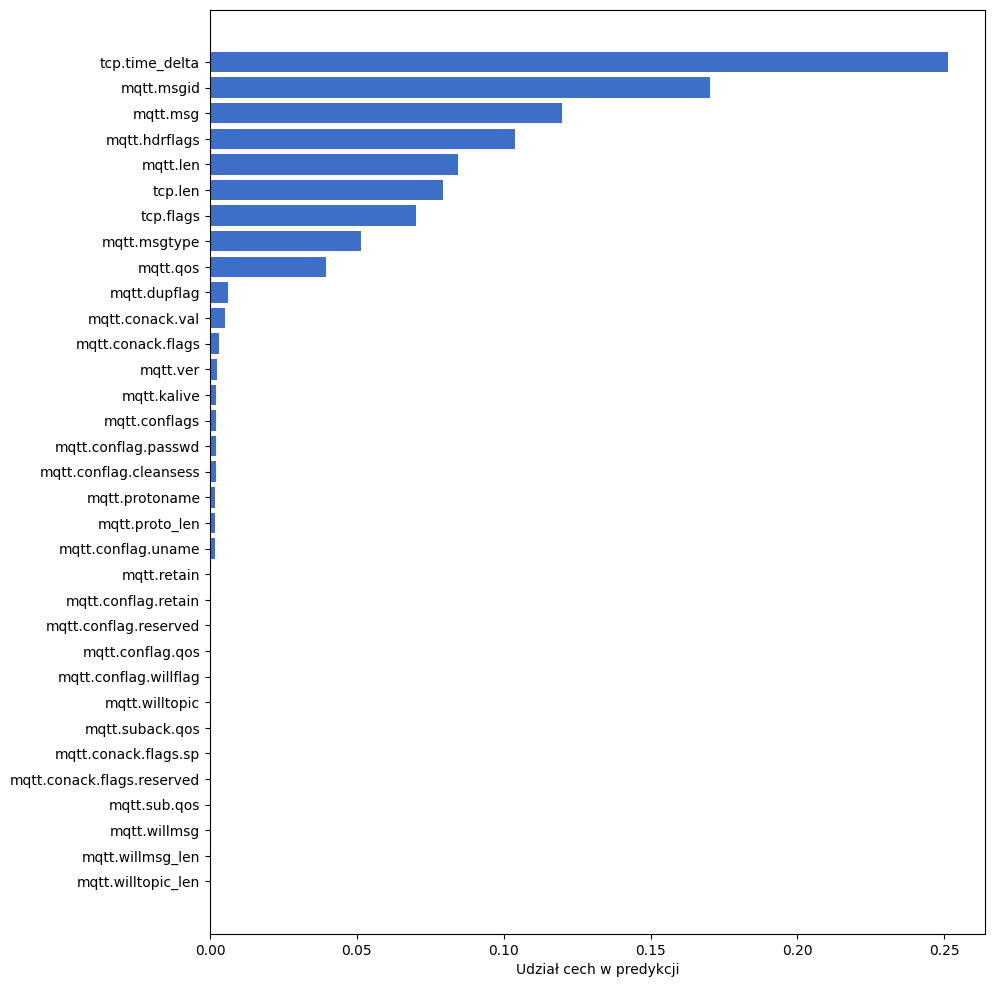

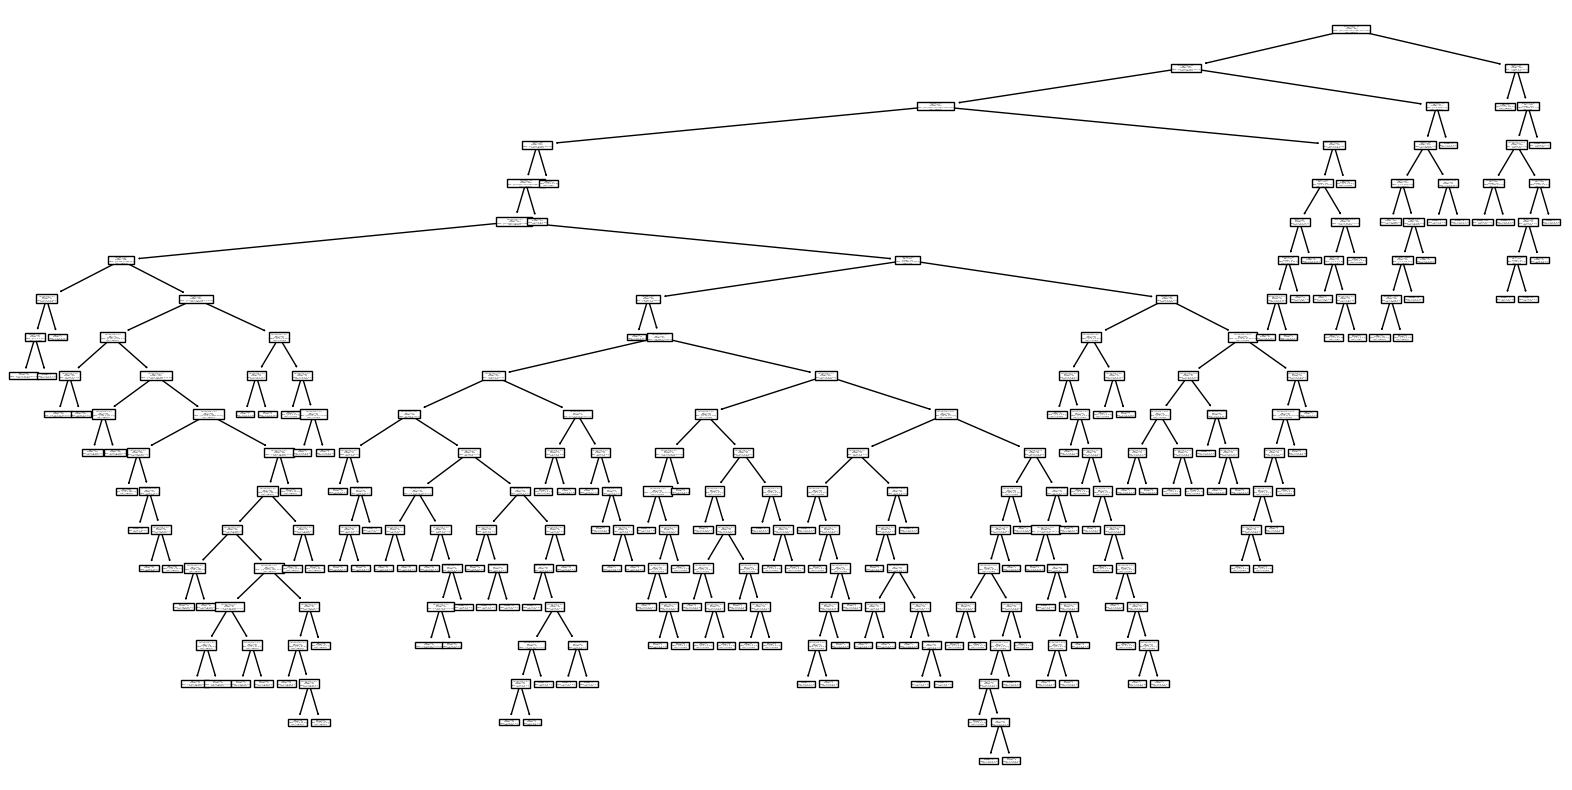

In [49]:
plt.figure(figsize=(10, 12))
# plt.title('Ważność cech')
plt.barh(range(len(indices)), importances[indices], align='center', color=(61/255,111/255,201/255))
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Udział cech w predykcji')
plt.show()

# Wizualizacja jednego z drzew w lesie
plt.figure(figsize=(20, 10))
plot_tree(grid_search.best_estimator_.estimators_[0], feature_names=X_train.columns, class_names=encoder.classes_, filled=False)
plt.show()

In [40]:
rf_classifier = RandomForestClassifier(n_estimators= best_params['n_estimators'], 
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       random_state=42)
rf_classifier.fit(X_train, y_train)
accuracy = rf_classifier.score(X_test, y_test)
print("Dokładność modelu Random forest:", accuracy)
# Użyj modelu SVM, który został już wytrenowany
y_pred = rf_classifier.predict(X_test)


y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

# Generowanie raportu klasyfikacji
clf_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=encoder.classes_)

print(f"Classification Report:\n{clf_report}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("#"*150)

Dokładność modelu Random forest: 0.9324000402860309
Classification Report:
              precision    recall  f1-score   support

  bruteforce       0.74      0.75      0.75      4351
        ddos       0.96      0.91      0.93     39077
       flood       1.00      0.29      0.45       184
  legitimate       0.93      0.99      0.96     49639
   malformed       0.76      0.62      0.68      3278
     slowite       1.00      1.00      1.00      2761

    accuracy                           0.93     99290
   macro avg       0.90      0.76      0.79     99290
weighted avg       0.93      0.93      0.93     99290

Confusion Matrix:
[[ 3265   500     0    49   537     0]
 [  244 35516     0  3281    36     0]
 [    1    21    53    73    36     0]
 [    0   642     0 48962    33     2]
 [  898   337     0    22  2021     0]
 [    0     0     0     0     0  2761]]
#################################################################################################################################

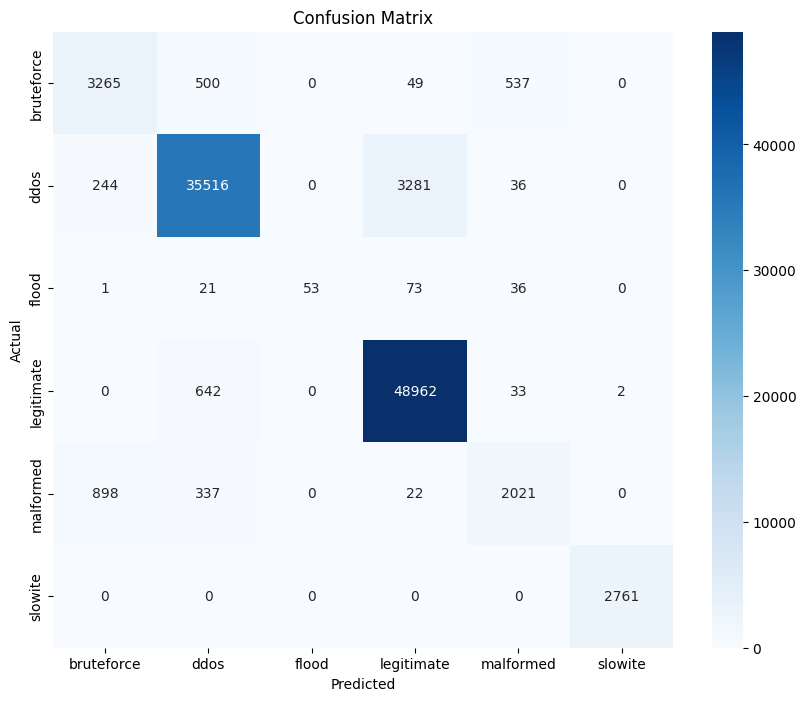

In [41]:
# Wizualizacja macierzy pomyłek
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()